#### **Note :** Run this code in google colab

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten


In [2]:
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

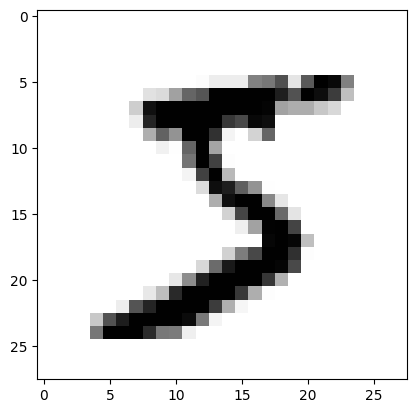

In [6]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

# sparse_categorical_crossentropy : one hot encoding not necessary
# categorical_crossentropy : one hot encoding not necessary


In [11]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8546 - loss: 0.5058 - val_accuracy: 0.9549 - val_loss: 0.1568
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9586 - loss: 0.1362 - val_accuracy: 0.9632 - val_loss: 0.1250
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0863 - val_accuracy: 0.9670 - val_loss: 0.1100
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9721 - val_loss: 0.0988
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9694 - val_loss: 0.1035
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9747 - val_loss: 0.0918
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0282 - val_accuracy: 0.9737 - val_loss: 0.0992
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0244 

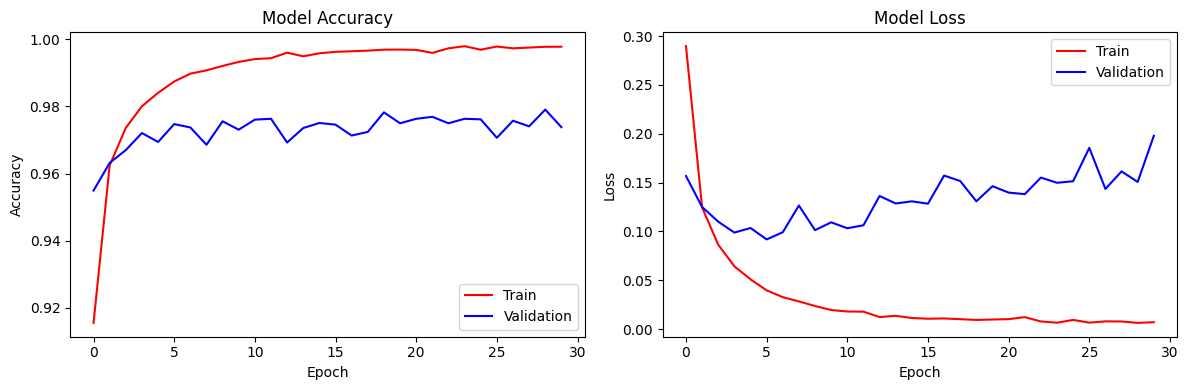

In [12]:
g, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot Accuracy
axes[0].plot(history.history['accuracy'], color='red', label='Train')
axes[0].plot(history.history['val_accuracy'], color='blue', label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Loss
axes[1].plot(history.history['loss'], color='red', label='Train')
axes[1].plot(history.history['val_loss'], color='blue', label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [13]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9745